In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pywaffle import Waffle

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic' 
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)

In [2]:
df = pd.read_excel('C:/JsCode/data/지역_국가.xlsx')

In [3]:
df

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91046,9792981,1662288
1,일본,일본,12156,1483173,172415
2,중국,중국,9607,241885,287607
3,소계:아시아,NaN,33123,4437828,476455
4,아시아,네팔,97,22691,582
...,...,...,...,...,...
71,기타,이스라엘,6,108,15
72,기타,이집트,0,0,0
73,기타,지부티,0,0,0
74,기타,카타르,572,114460,28464


In [4]:
df.dropna(axis=0,inplace=True)
df

,지역,국가,운항(편),여객(명),화물(톤)
1,일본,일본,12156,1483173,172415
2,중국,중국,9607,241885,287607
4,아시아,네팔,97,22691,582
5,아시아,대만,2986,140608,28840
6,아시아,라오스,243,27279,475
...,...,...,...,...,...
71,기타,이스라엘,6,108,15
72,기타,이집트,0,0,0
73,기타,지부티,0,0,0
74,기타,카타르,572,114460,28464


In [5]:
df.drop(['지역','화물(톤)'],axis=1,inplace=True)
df

,국가,운항(편),여객(명)
1,일본,12156,1483173
2,중국,9607,241885
4,네팔,97,22691
5,대만,2986,140608
6,라오스,243,27279
...,...,...,...
71,이스라엘,6,108
72,이집트,0,0
73,지부티,0,0
74,카타르,572,114460


In [6]:
df1 = df.sort_values(by='운항(편)',ascending=False)
df1.drop(['여객(명)'],axis=1,inplace=True)

df2 = df.sort_values(by='여객(명)',ascending=False)
df2.drop(['운항(편)'],axis=1,inplace=True)

In [7]:
df_flight = df1[:10]
df_flight.index = ['1위','2위','3위','4위','5위','6위','7위','8위','9위','10위']
df_flight.index.name = '운항순위'
df_flight

,국가,운항(편)
운항순위,,
1위,미국,20041
2위,일본,12156
3위,베트남,10418
4위,중국,9607
5위,필리핀,4497
6위,태국,4121
7위,독일,3370
8위,홍콩,2993
9위,대만,2986


In [8]:
df_passenger = df2[:10]
df_passenger.index = ['1위','2위','3위','4위','5위','6위','7위','8위','9위','10위']
df_passenger.index.name = '승객순위'
df_passenger

,국가,여객(명)
승객순위,,
1위,일본,1483173
2위,베트남,1405811
3위,미국,1396365
4위,태국,764279
5위,필리핀,696884
6위,싱가포르,519726
7위,중국,241885
8위,캐나다,232024
9위,아랍에미레이트,227802


In [9]:
flight_color = ['gold','aquamarine','plum','red','greenyellow','teal','lightslategrey','chartreuse','aqua','navy']
passenger_color = ['aquamarine','plum','gold','teal','greenyellow','navy','red','orange','green','lightslategrey']

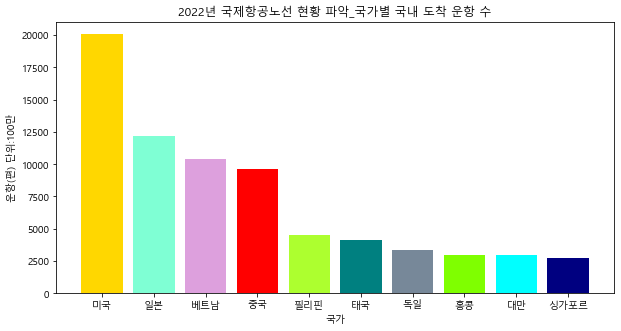

In [10]:
colors = flight_color

plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 운항 수')
plt.xlabel('국가')
plt.ylabel('운항(편) 단위:100만')
plt.bar(df_flight['국가'],df_flight['운항(편)'],color=colors)

plt.show()

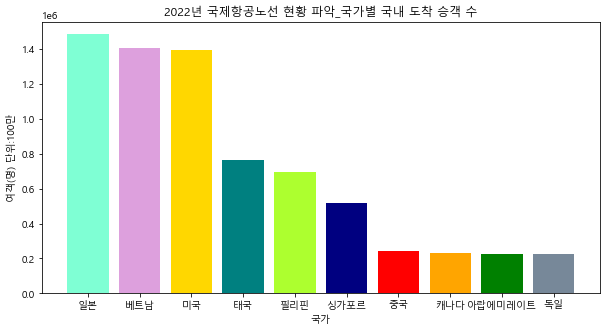

In [11]:
colors = passenger_color

plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 승객 수')
plt.xlabel('국가')
plt.ylabel('여객(명) 단위:100만')
plt.bar(df_passenger['국가'],df_passenger['여객(명)'],color=colors)

plt.show()

In [12]:
df_passenger.iloc[:,1]

승객순위
1위     1483173
2위     1405811
3위     1396365
4위      764279
5위      696884
6위      519726
7위      241885
8위      232024
9위      227802
10위     225941
Name: 여객(명), dtype: int64

In [13]:
df_passenger.iloc[:,1].sum()

7193890

In [14]:
df_passenger.iloc[:,1]/df_passenger.iloc[:,1].sum()*100


승객순위
1위     20.617121
2위     19.541736
3위     19.410430
4위     10.624002
5위      9.687165
6위      7.224547
7위      3.362367
8위      3.225293
9위      3.166604
10위     3.140735
Name: 여객(명), dtype: float64

In [15]:
import matplotlib.pyplot as plt
from pywaffle import Waffle


import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic' 
matplotlib.rcParams['axes.unicode_minus']=False

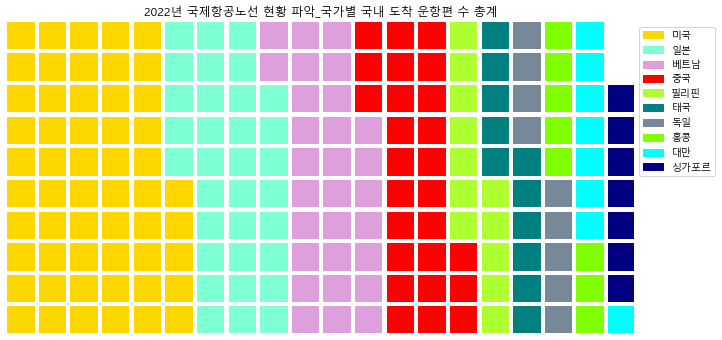

In [16]:
plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=df_flight['운항(편)'],
    labels=list(df_flight['국가']), 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    colors=flight_color
)
plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 운항편 수 총계')
figsize=(1, 1)
plt.show() 

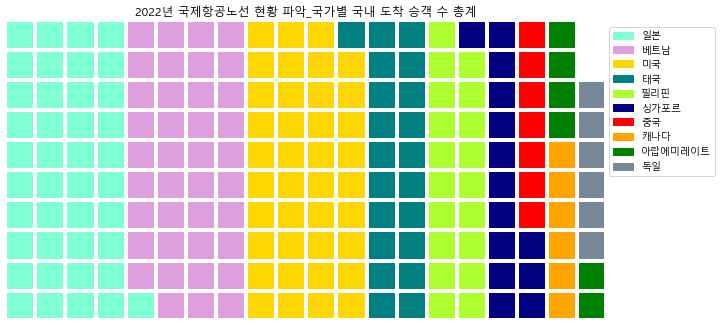

In [17]:
plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=df_passenger['여객(명)'],
    labels=list(df_passenger['국가']),  
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    colors=passenger_color
    
)
plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 승객 수 총계')
figsize=(1, 1)
plt.show()

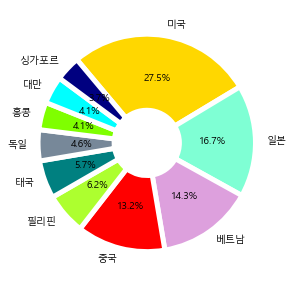

In [18]:
colors = flight_color
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
pie_labels = df_flight['국가']
pie_values = df_flight['운항(편)']
plt.pie(pie_values, labels = pie_labels, autopct='%.1f%%',startangle=130,counterclock=False, wedgeprops=wedgeprops,colors=colors)
plt.show()

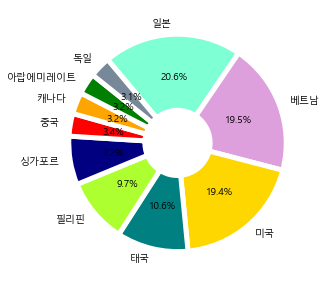

In [19]:
colors = passenger_color
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
pie_labels = df_passenger['국가']
pie_values = df_passenger['여객(명)']
plt.pie(pie_values, labels = pie_labels, autopct='%.1f%%',startangle=130,counterclock=False, wedgeprops=wedgeprops,colors=colors)
plt.show()

In [20]:
total = pd.read_excel('c:/jscode/data/total.xlsx')

In [21]:
total.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:
total

,국가,운항(편),여객(명),iso_a3
0,일본,12156,1483173,JPN
1,중국,9607,241885,CHN
2,네팔,97,22691,NPL
3,대만,2986,140608,TWN
4,라오스,243,27279,LAO
...,...,...,...,...
64,이디오피아,157,19078,ETH
65,이스라엘,6,108,ISR
66,이집트,0,0,EGY
67,지부티,0,0,DJI


In [23]:
pth = gpd.datasets.get_path('naturalearth_lowres')
df_world = gpd.GeoDataFrame.from_file(pth)
df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [24]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
city = cities[cities['name'].isin(['Singapore'])]
city

,name,geometry
241,Singapore,POINT (103.85387 1.29498)


In [25]:
df_world = pd.concat([df_world,city],axis=0)
df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
173,622137.0,Europe,Montenegro,MNE,5542.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [26]:
data = df_world.merge(total, on='iso_a3')
data.drop(['pop_est','gdp_md_est'],axis=1,inplace=True)
data

,continent,name,iso_a3,geometry,국가,운항(편),여객(명)
0,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",캐나다,1187,232024
1,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",미국,20041,1396365
2,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",카자흐스탄,290,57103
3,Asia,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",우즈베키스탄,566,88991
4,Asia,Indonesia,IDN,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",인도네시아,911,176455
...,...,...,...,...,...,...,...
57,Asia,Japan,JPN,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",일본,12156,1483173
58,Asia,Saudi Arabia,SAU,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",사우디아라비아,97,9375
59,Africa,Egypt,EGY,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",이집트,0,0
60,Africa,Ethiopia,ETH,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",이디오피아,157,19078


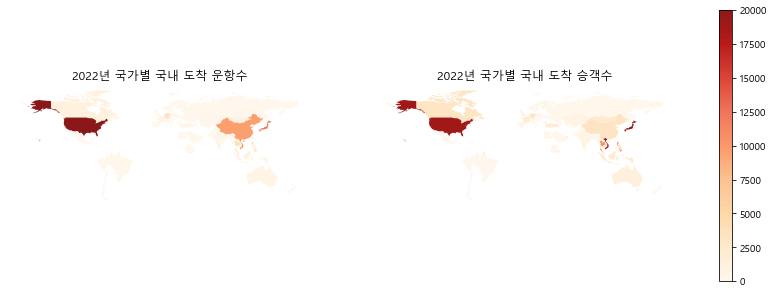

In [27]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,10)) 
data.plot(ax=ax[0], column="운항(편)", cmap="OrRd", legend=False, alpha=0.9)
data.plot(ax=ax[1], column="여객(명)", cmap="OrRd", legend=False, alpha=0.9)
patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)
ax[0].set_title('2022년 국가별 국내 도착 운항수')
ax[1].set_title('2022년 국가별 국내 도착 승객수')
ax[0].set_axis_off();
ax[1].set_axis_off(); 

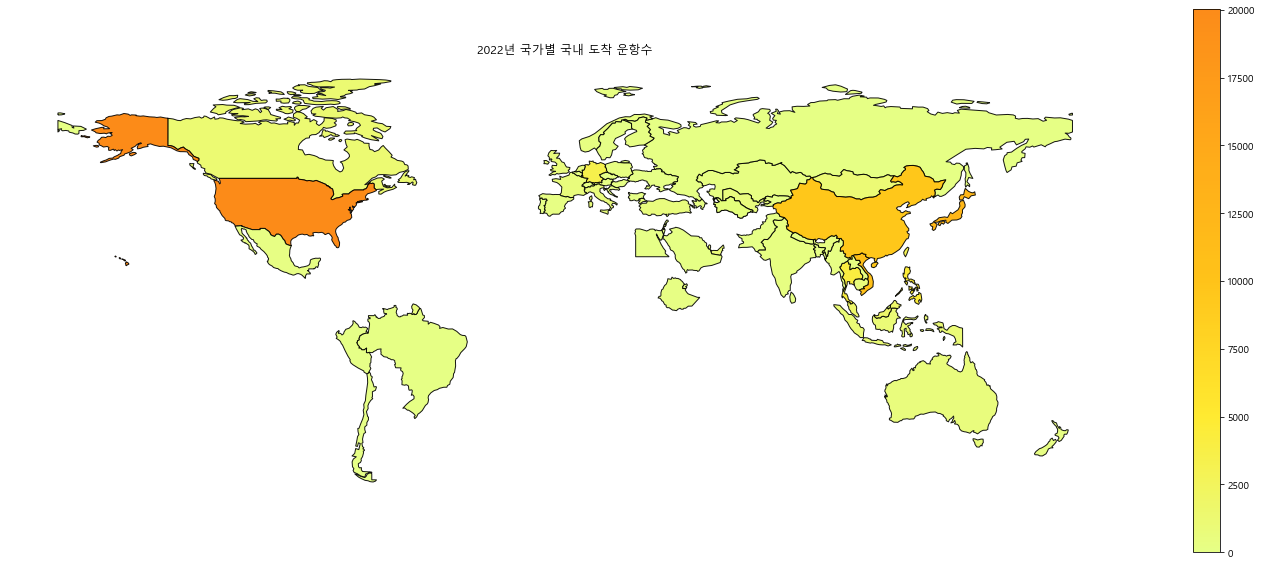

In [47]:
fig, ax = plt.subplots(sharey=True, figsize=(25,20))
data.plot(ax=ax, column="운항(편)", cmap="Wistia", legend=False, alpha=0.9, edgecolor = 'k')
patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)
ax.set_title('2022년 국가별 국내 도착 운항수')
ax.set_axis_off();
plt.show()

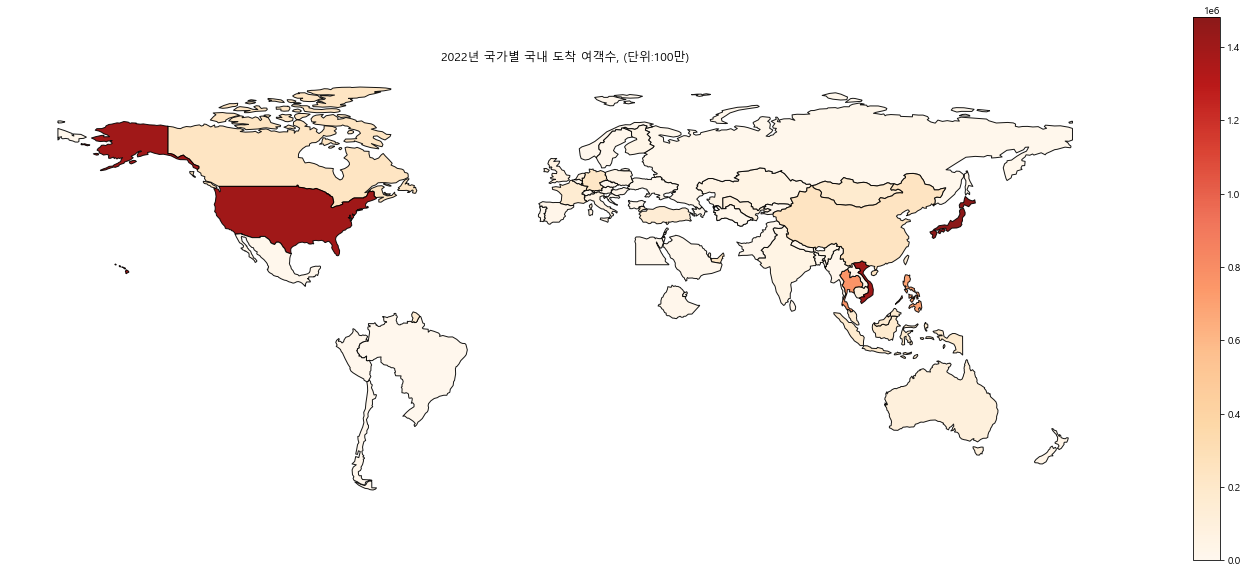

In [44]:
fig, ax = plt.subplots(sharey=True, figsize=(25,20))
data.plot(ax=ax, column="여객(명)", cmap="OrRd", legend=False, alpha=0.9, edgecolor = 'k')
patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)
ax.set_title('2022년 국가별 국내 도착 여객수, (단위:100만)')
ax.set_axis_off();
plt.show()